In [1]:
# Dependencies
%matplotlib notebook
import sqlalchemy
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read final combined csv into DF and clean/display
DF = pd.read_csv('../output/result2.csv')
DF = DF.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
DF

,Movie_Title,IMDB,Film Rating,Released,Runtime,Genre,Movie_Links,shit,fuck,damn,...,dick,pussy,cock,bastard,douche,total_words,total_bad_words,Runtime_minutes,bad_word_frequency,Year
0,10 Things I Hate About You,0.73,PG-13,31 Mar 1999,97 min,"Comedy, Drama, Romance",/10-Things-I-Hate-About-You.html,8.0,2.0,3.0,...,2.0,1.0,0.0,0.0,0.0,19152.0,31.0,97.0,3.13,1999
1,12,0.77,PG-13,20 Sep 2007,159 min,"Crime, Drama, Thriller, War",/12.html,1.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,14144.0,6.0,159.0,26.50,2007
2,12 and Holding,0.76,R,07 Jul 2006,94 min,Drama,/12-and-Holding.html,10.0,4.0,3.0,...,0.0,7.0,0.0,1.0,0.0,18999.0,35.0,94.0,2.69,2006
3,12 Monkeys,0.77,TV-14,16 Jan 2015,42 min,"Adventure, Drama, Mystery, Sci-Fi, Thriller",/12-Monkeys.html,4.0,5.0,2.0,...,0.0,1.0,0.0,2.0,0.0,32272.0,20.0,42.0,2.10,2015
4,12 Years a Slave,0.81,R,08 Nov 2013,134 min,"Biography, Drama, History",/12-Years-a-Slave.html,0.0,0.0,12.0,...,0.0,0.0,0.0,3.0,0.0,31014.0,16.0,134.0,8.38,2013
5,127 Hours,0.76,R,28 Jan 2011,94 min,"Adventure, Biography, Drama, Thriller",/127-Hours.html,10.0,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,18959.0,24.0,94.0,3.92,2011
6,15 Minutes,0.61,R,09 Mar 2001,120 min,"Action, Crime, Drama, Thriller",/15-Minutes.html,15.0,1.0,1.0,...,0.0,0.0,0.0,3.0,0.0,26049.0,23.0,120.0,5.22,2001
7,17 Again,0.64,PG-13,17 Apr 2009,102 min,"Comedy, Drama, Fantasy",/17-Again.html,1.0,0.0,1.0,...,1.0,0.0,0.0,2.0,0.0,19103.0,6.0,102.0,17.00,2009
8,2012,0.58,PG-13,13 Nov 2009,158 min,"Action, Adventure, Sci-Fi",/2012.html,6.0,0.0,5.0,...,0.0,0.0,0.0,4.0,0.0,26650.0,19.0,158.0,8.32,2009
9,30 Minutes or Less,0.61,R,12 Aug 2011,83 min,"Action, Comedy, Crime",/30-Minutes-or-Less.html,61.0,92.0,5.0,...,4.0,4.0,3.0,0.0,0.0,24500.0,194.0,83.0,0.43,2011


<IPython.core.display.Javascript object>


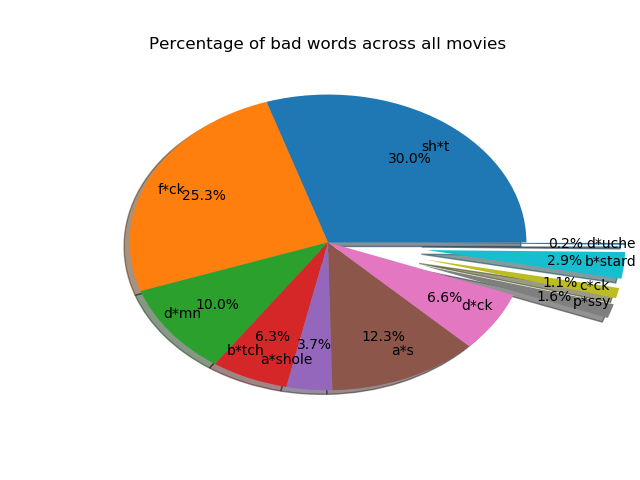

In [5]:
#obtain total word counts for each word across all movies
wordTotals = DF[['shit', 'fuck', 'damn', 'bitch', 'asshole', 
    'ass', 'dick', 'pussy', 'cock', 'bastard', 'douche']].sum().tolist()
#pie plot labels and explode parameters
labels = ['sh*t', 'f*ck', 'd*mn', 'b*tch', 'a*shole', 
    'a*s', 'd*ck', 'p*ssy', 'c*ck', 'b*stard', 'd*uche']
explode = (0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5)
#pie plot
plt.pie(wordTotals, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode,
        pctdistance=0.7, labeldistance=0.8)
plt.title("Percentage of bad words across all movies")
plt.savefig('../Figures/percentBadWordPie.png')

In [4]:
# Create Engine and Pass in MySQL Connection
engine = create_engine("mysql://<user>:<password>@127.0.0.1:3306/moviebadwords")
conn = engine.connect()
#put final csv into mySQL Database
DF.to_sql(con=engine, index_label='id', name="moviebadwords", if_exists='replace')

ModuleNotFoundError: No module named 'MySQLdb'